
This is a basic multiple linear regression model. The model is trained without using libraries and there is no testing and training split

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Mini Projects/Datasets/Student_Performance.csv')
print(df)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  Score  
0                                    1   91.0  
1                                    2   65.0  
2                                    2   45.0  
3                                    2   36.0  
4                                    5   66.0  
...                                ...    ...  
9995                       

In [18]:
#now lets take the input rows to numpy arrays
x1 = df['Hours Studied'].to_numpy()
x2 = df['Previous Scores'].to_numpy()
x3 = df['Sleep Hours'].to_numpy()
x4 = df['Sample Question Papers Practiced'].to_numpy()
X = np.column_stack((x1,x2,x3,x4))
y = df['Score'].to_numpy()
print(f"X: {X}\n y: {y}")

X: [[ 7 99  9  1]
 [ 4 82  4  2]
 [ 8 51  7  2]
 ...
 [ 6 83  8  5]
 [ 9 97  7  0]
 [ 7 74  8  1]]
 y: [91. 65. 45. ... 74. 95. 64.]


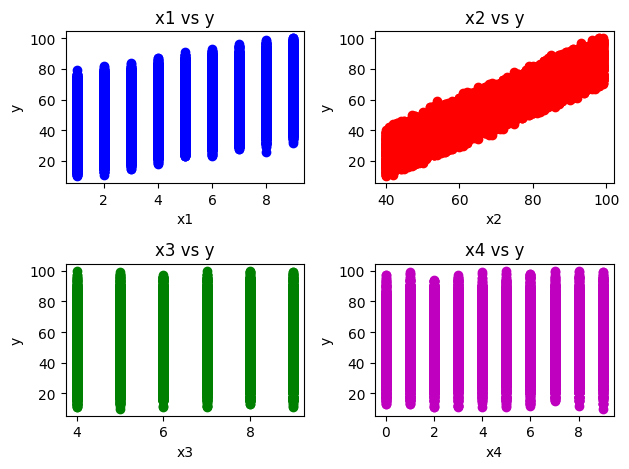

In [13]:
#As you cant plot 4 features to y, lets plot each feature to y
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st subplot
plt.scatter(x1, y, color='b')
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd subplot
plt.scatter(x2, y, color='r')
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd subplot
plt.scatter(x3, y, color='g')
plt.title('x3 vs y')
plt.xlabel('x3')
plt.ylabel('y')

plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th subplot
plt.scatter(x4, y, color='m')
plt.title('x4 vs y')
plt.xlabel('x4')
plt.ylabel('y')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

In [25]:
#normalising the data to prevent overflowing
X_min = X.min()
X_max = X.max()
y_min = y.min()
y_max = y.max()
X = (X - X_min) / (X_max - X_min)
y = (y - y_min) / (y_max - y_min)

In [19]:
#defining cost function
def cost_function(X,y,w,b):
  m = X.shape[0]
  cost = 0
  for i in range(m):
    f = np.dot(w,X[i]) + b
    cost += (f-y[i])**2

  cost/= (2*m)
  return cost

In [22]:
#function for finding derivates in gradient descent (dj_db, dj_dw)
def derive(X,y,w,b):
  m = X.shape[0]
  n = w.shape[0]
  dj_db = 0
  dj_dw = np.zeros(n)
  for i in range(m):
    f = np.dot(w,X[i]) + b
    for j in range(n):
      dj_dw[j] += (f-y[i])*X[i][j]
    dj_db += (f-y[i])

  dj_db /= m
  dj_dw /= m

  return dj_dw, dj_db

In [23]:
#creeating gradient descent
def gradient_descent(X,y,w,b,alpha,iterations):
  costs = []
  n = w.shape[0]
  for i in range(iterations):
    dj_dw, dj_db = derive(X,y,w,b)
    #update parameters
    for j in range(n):
      w[j] = w[j] - (alpha*dj_dw[j])
    b = b - (alpha*dj_db)


    if i % 100 == 0:
      cost = cost_function(X, y, w, b)
      costs.append(cost)
      print(f"Iteration {i}: Cost {cost}")

  return w, b, costs

Iteration 0: Cost 1.117170118365349
Iteration 100: Cost 0.058799398355372
Iteration 200: Cost 0.00836528725600837
Iteration 300: Cost 0.005876325695853508
Iteration 400: Cost 0.005671280506838811
Iteration 500: Cost 0.005578179838493037
Iteration 600: Cost 0.005493583124204018
Iteration 700: Cost 0.005412442869642918
Iteration 800: Cost 0.005334396671344481
Iteration 900: Cost 0.005259309879404638


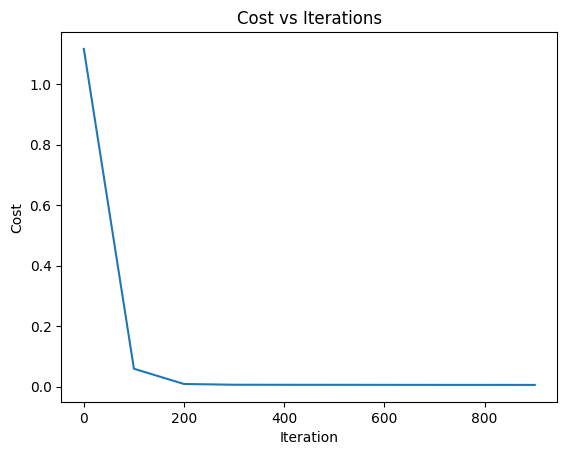

In [36]:
w = np.zeros(4)
b = -1
alpha = 0.01
iterations = 1000
w_final, b_final, costs = gradient_descent(X,y,w,b,alpha,iterations)
plt.plot(range(0,iterations,100),costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

In [37]:
print("Final weights:", w)
print("Final bias:", b)

Final weights: [0.06851264 0.78833579 0.06376308 0.04575334]
Final bias: -1


In [40]:
#predicting
x_predict = [8,64,5,1]
x_predict = (x_predict - X_min) / (X_max - X_min)
prediction = np.dot(w_final,x_predict) + b_final
prediction = prediction * (y_max - y_min) + y_min
print(prediction)

51.70663946941557
